We start by loading the appropriate modules and configurations

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from densitysplit.utilities import sky_to_cartesian
from densitysplit.cosmology import Cosmology
%matplotlib inline
%config InlineBackend.figure_format='retina'
%reload_ext autoreload
%autoreload 2

We now call the stand-alone version of the pipeline, which can be run directly on the command line. We have specified all configuration parameters of the pipeline in a YAML parameter file that can be passed directly to the script.

Note: we will get an annoying (but harmless) warning message from PyCall (which is the module in charge of calling Julia for fast computations). This issue has been raised in JuliaPy repository, but is yet to be solved.

In [2]:
!time densitysplit -p params.yaml

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall ~/.julia/packages/PyCall/3fwVL/src/numpy.jl:67
densitysplit -p params.yaml  21.72s user 2.83s system 99% cpu 24.650 total


At this point, the script has already finished and generated two files: one of them containing the density PDF of random points, and another one containing the positions of density split quantiles. We begin by plotting the density PDF.

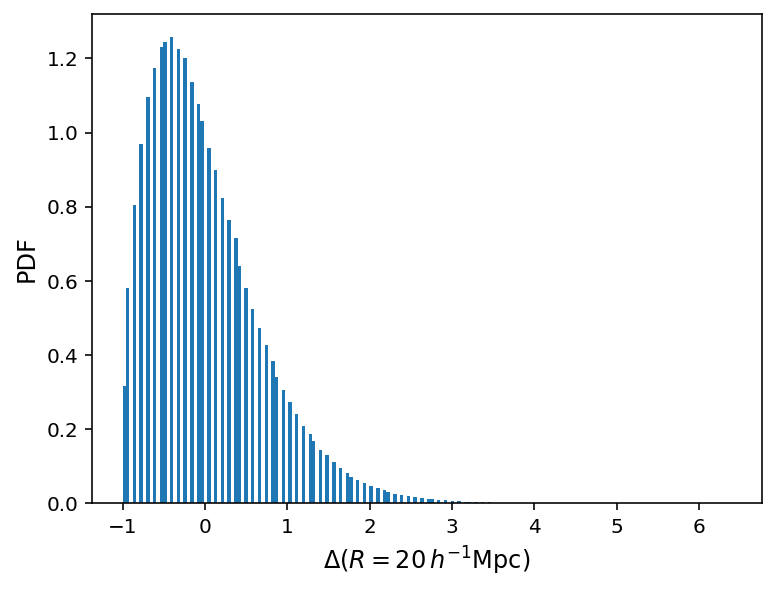

In [3]:
density_pdf = np.load('mock_data_density_pdf.npy')

fig, ax = plt.subplots(figsize=(6,4.5))
ax.hist(density_pdf, bins=180, density=True)

ax.set_xlabel(r'$\Delta(R = 20\,h^{-1}{\rm Mpc})$', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
plt.show()

Finally, we plot a projection on the X-Y plane of two density split quantiles: DS1 and DS5 (low and high density, respectively). We compare this against the positions of galaxies, so that we can see how DS1 positions are clustered in low density environments, where few galaxies are found, whereas DS5 positions sit on overdese clumps.

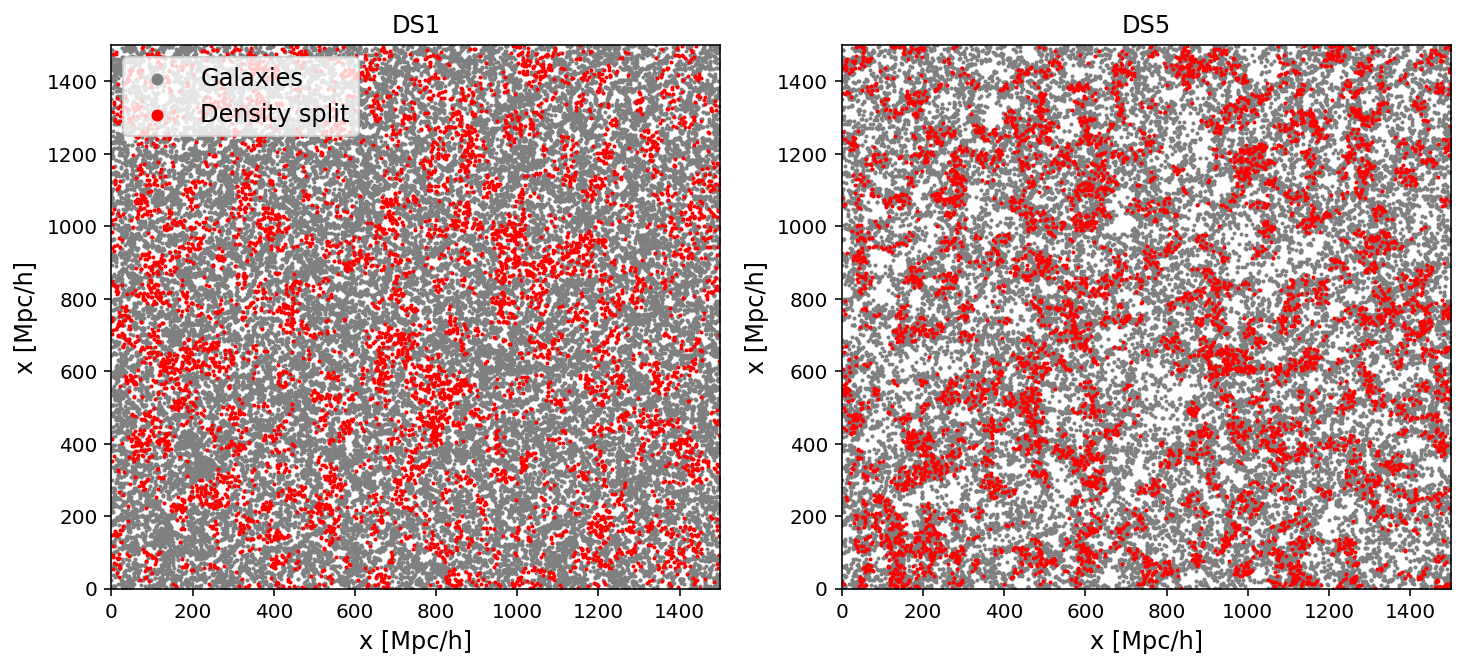

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

with fits.open('data/mock_data.fits') as hdul:
    mock_data = hdul[1].data
    
xgal = mock_data['X']
ygal = mock_data['Y']
zgal = mock_data['Z']
idx = zgal < 50

ax[0].scatter(xgal[idx], ygal[idx], s=1.0, color='grey', label='Galaxies')
ax[1].scatter(xgal[idx], ygal[idx], s=1.0, color='grey', label='Galaxies')

quantiles = np.load('mock_data_quantiles.npy', allow_pickle=True).item()

for i, qt in enumerate([1, 5]):

    xds = quantiles[f'DS{qt}'][:, 0]
    yds = quantiles[f'DS{qt}'][:, 1]
    zds = quantiles[f'DS{qt}'][:, 2]
    idx = zds < 50

    ax[i].scatter(xds[idx],yds[idx], s=1.0, color='r', label='Density split')
    ax[i].set_title(f'DS{qt}', fontsize=12)

    ax[i].set_xlabel('x [Mpc/h]', fontsize=12)
    ax[i].set_ylabel('x [Mpc/h]', fontsize=12)
    
    ax[i].set_xlim(0, 1500)
    ax[i].set_ylim(0, 1500)

ax[0].legend(fontsize=12, markerscale=5, loc='upper left')
plt.show()